# Programming Excercise 1: Linear Regression

## Introduction
In this exercise, you will implement linear regression and get to see it work on data. 

## 1. Linear regression with one variable

In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant fracnchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

You would like to use this data to help you select which city to expand to next.

The file `data/ex1/ex1data1.txt` contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

Note: The file `data/ex1/ex1data1.txt` and `data/ex1/ex1data2.txt` are both CSV (Comma-separated Value) files. `data/ex1/ex1data1.txt` contains two columns, the first column `x` indicates the population, the second column `y` indicates the profit.

### 1.1. Plotting the Data

Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). (Many other problems that you will encounter in real life are multi-dimensional and can't be plotted on a 2-d plot.)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib inline

In [2]:
# Linear regresssion with one variable

# Load data from CSV file
# - column 1: population (x)
# - column 2: profit (y)
data = np.loadtxt('data/ex1/ex1data1.txt', delimiter=',')  # type: numpy.ndarray

m = data.shape[0]  # number of training examples
print("The number of training examples: " + str(m))

# Split data into variables X and y
# The usage of np.hsplit
#   - np.hsplit(a, 3) # split a into 3
#   - np.hsplit(a, (3, 4)) # split a after the third and the fourth column
X, y = np.hsplit(data, 2)

# Print out some data points
print("First 10 examples from the dataset:")
for i in range(10):
    print("x = " + str(X[i, :]) + ", y = " + str(y[i]))

The number of training examples: 97
First 10 examples from the dataset:
x = [ 6.1101], y = [ 17.592]
x = [ 5.5277], y = [ 9.1302]
x = [ 8.5186], y = [ 13.662]
x = [ 7.0032], y = [ 11.854]
x = [ 5.8598], y = [ 6.8233]
x = [ 8.3829], y = [ 11.886]
x = [ 7.4764], y = [ 4.3483]
x = [ 8.5781], y = [ 12.]
x = [ 6.4862], y = [ 6.5987]
x = [ 5.0546], y = [ 3.8166]


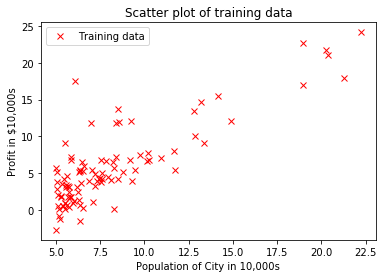

In [3]:
# Plot data
def plotData(X, y, labelStr):
    plt.plot(X, y, 'rx', label=labelStr)
    plt.xlabel("Population of City in 10,000s") # set the x-axis label
    plt.ylabel("Profit in $10,000s")  # set the y-axis label
    plt.legend()

plotData(X, y, "Training data")
plt.title("Scatter plot of training data")
plt.show()

### 1.2. Gradient Descent

#### 1.2.1. Update Equations
In this part, you will fit linear regression is to minimize the cost function
$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m}(h_{\theta}(x^{(i)}-y^{(i)})^2$$
where the hypothesis $h_{\theta}(x)$ is given by the linear model
$$h_{\theta}(x) = \theta^T x = \theta_0 + \theta_1 x_1$$

Recall that the parameters of your model are the $\theta_j$ values. These are the values you will adjust to minimize cost $J(\theta)$. One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration peforms the update
$$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)} - y^{(i)}) x_j^{(i)} \quad(\text{simultaneously update } \theta_j \text{ for all } j).$$

With each step of gradient descent, your parameter $\theta_j$ come closer to the optimal values that will achieve the lowest cost $J(\theta)$

**Implementation Note:** We store each example as a row in the $X$ matrix. To take into account the intercept term ($\theta_0$), we add an additional first column to $X$ and set it to all ones. This allows us to treat $\theta_0$ as simply another 'feature'.

#### 1.2.2. Implementation
In the following lines, we add another dimension to our data to accommodate the $\theta_0$ intercept term. We also initialize the initialize the initial parameters to 0 and the learning rate `alpha` to 0.01.

In [4]:
# Add intercept term to X
X = np.hstack((np.ones((m, 1), dtype=X.dtype), X))
assert(X.shape[1] == 2)
# print(X)
theta = np.zeros((2, 1))  # initialize fitting parameters

iterations = 1500
alpha = 0.01

#### 1.2.3. Computing the cost $J(\theta)$
As you perform gradient descent to learn minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate $J(\theta)$ so you can check teh convergence of your gradient descent implementation.

Your next task is to complete is function `computeCost` which computes $J(\theta)$. As you are doing this, remember that the variables $X$ and $y$ are not scalar values, but matrices whose rows represent the examples from the training set.

Once you have completed the function and initialized $\theta$ to zeros, run `computeCost` and see the cost printed to the screen.

You should expect to see a cost of `32.07`.

In [5]:
def computeCost(X, y, theta):
    """
    Compute cost for linear regression
    J = compuateCost(X, y, theta) computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    """
    
    # Initialize some useful values
    m = X.shape[0]
    
    # You need to return the following variables correctly
    J = 0
    
    # Compute the cost J of a particular choice of theta
    H = np.dot(X, theta) - y;
    J = np.sum(np.power(H, 2)) / (2 * m)
    
    return J

In [6]:
print("Tesing the cost function...")
# Compute and display initial cost
J = computeCost(X, y, np.array([[0], [0]]))
print("With theta = [[0], [0]]\nCost computed = " + str(J))
print("Expected cost value (approx) 32.07")

# Further testing of the cost function
J = computeCost(X, y, np.array([[-1], [2]]))
print("With theta = [[-1], [2]]\nCost computed = " + str(J))
print("Expected cost value (approx) 54.24")

Tesing the cost function...
With theta = [[0], [0]]
Cost computed = 32.0727338775
Expected cost value (approx) 32.07
With theta = [[-1], [2]]
Cost computed = 54.242455082
Expected cost value (approx) 54.24


#### 1.2.4. Gradient descent
Next, you will implement gradient descent in the function `gradientDescent`. You need to supply the updates to $\theta$ within each iteration.

As your program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind the cost $J(\theta)$ is parameterized by the vector $\theta$, not $X$ and $y$. That is, we minimize the value of $J(\theta)$ by changing the values of the vector $\theta$, not by changing $X$ or $y$. Refer to the equations in this handout and to the video lectures if you are uncertain.

A good way to verify that gradient descent is working correctlly is to look at the value of $J(\theta)$ and check that it is decreasing with each step. The starter code for `gradientDescent` function call `computecost` function on every iteration and prints the cost. Assuming you have implemented `gradientDescent` and `computeCost` correctly, your value of $J(\theta)$ should never increase, and should converge to steady value by the end of the algorithm.

After you are finished, use the final parameters to plot the linear fit.

Your final values for $\theta$ will also be used to make predictions on profits in areas of 35,000 and 70,000 people.

In [7]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    Function gradientDescent performs gradient descent to learn theta.
    theta, J = gradientDescent(X, y, theta, alpha, num_iters) updates theta
    by taking num_iters gradient steps with learning rate alpha.
    """
    
    # Initialize some useful values
    m = X.shape[0]  # number of training examples
    J_history = np.zeros((num_iters, 1))
    
    for iter in range(num_iters):
        # Perform a single gradient step on the parameter vector theta
        # While debugging, it can be useful to print out the values of
        # cost function (computeCost) and gradient here.
        Sigma = np.sum(np.multiply((np.dot(X, theta) - y), X), axis=0, keepdims=True)
        theta = theta - alpha * Sigma.T / m
        # Save the cost J in every itreation
        J_history[iter] = computeCost(X, y, theta);
    
    return theta, J_history

In [8]:
# Run gradient descent
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)

# Print theta to screen
print("Theta found by gradient descent:")
print(theta)
print("Expected theta values (approx)")
print(np.array([[-3.6303], [1.1664]]))

Theta found by gradient descent:
[[-3.63029144]
 [ 1.16636235]]
Expected theta values (approx)
[[-3.6303]
 [ 1.1664]]


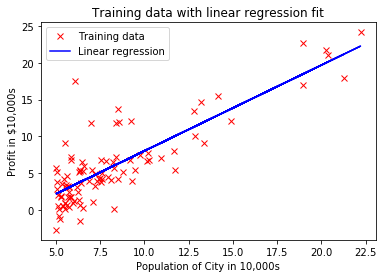

In [9]:
# Plot lienar fit
plotData(X[:, 1], y, "Training data")
plt.plot(X[:, 1], np.dot(X, theta), 'b-', label='Linear regression')
plt.legend()
plt.title("Training data with linear regression fit")
plt.show()

In [10]:
# Predict values for population sizes of 35,000 and 70,000
predict = np.dot(np.array([[1, 3.5]]), theta)
print("For population = 35,000, we predict a profit of " + str(float(predict*10000)))
predict = np.dot(np.array([[1, 7]]), theta)
print("For population = 70,000, we predict a profit of " + str(float(predict*10000)))

For population = 35,000, we predict a profit of 4519.7678677017675
For population = 70,000, we predict a profit of 45342.45012944714


### 1.3. Visualizing $J(\theta)$
To understand the cost function $J(\theta)$ better, you will now plot the cost over a 2-dimensional grid of $\theta_0$ and $\theta_1$ values. You will not need to code anything new for this part, but you should understand how the code you have written already is creating these images.

In the next step, there is code set up to calculate $J(\theta)$ over a grid of values using the `computeCost` function that you wrote.

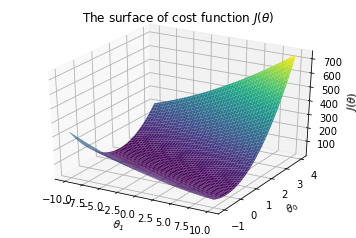

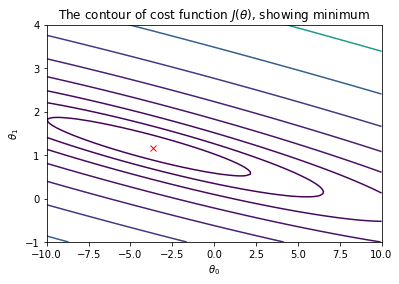

In [11]:
# Visualizing J(theta_0, theta_1)

# Grid over which we will calculate
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)  

# Initialize J_vals to a matrix of zeros
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Fill out J_vals
for i in range(theta0_vals.shape[0]):
    for j in range(theta1_vals.shape[0]):
        t = np.array([[theta0_vals[i]], [theta1_vals[j]]])
        J_vals[i][j] = computeCost(X, y, t)

# Make the meshgrid
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals) 

# Surface plot
figSurf = plt.figure()
ax = figSurf.gca(projection='3d')
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
surf = ax.plot_surface(theta0_vals, theta1_vals, J_vals.T, cmap=cm.viridis)
ax.set_xlabel(r"$\theta_1$")
ax.set_ylabel(r"$\theta_0$")
ax.set_zlabel(r"$J(\theta)$")
plt.title(r"The surface of cost function $J(\theta)$")
plt.show()
# Contour plot
figContour = plt.figure()
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
plt.contour(theta0_vals, theta1_vals, J_vals.T, levels=np.logspace(-2, 3, 20))
# Plot optimum
plt.plot(theta[0], theta[1], 'rx')
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")
plt.title(r"The contour of cost function $J(\theta)$, showing minimum")
plt.show()

The purpose of these graphs is to show you that how $J(\theta)$ varies with changes in $\theta_0$ and $\theta_1$. The cost function $J(\theta)$ is bowl-shaped and has a global minimum. (This is easier to see in the contour plot than in the 3D surface plot). This minimum is the optimal point for $\theta_0$ and $\theta_1$, and each step of gradient descent moves closer to this point.

## 2. Linear regression with multiple variables

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file `ex1data2.txt` contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

In [12]:
# Load data from CSV file
# - column 1: house size in feet**2 (x1)
# - column 2: number of bedrooms (x2)
# - column 3: house price (y)
data = np.loadtxt('data/ex1/ex1data2.txt', delimiter=',')

# Separate features X and labels y
X, y = np.hsplit(data, np.array([2]))

# The number of training examples
m = X.shape[0]

# Print out some data points
print("First 10 examples from the dataset:")
for i in range(10):
    print("x = " + str(X[i, :]) + ", y = " + str(y[i]))

First 10 examples from the dataset:
x = [ 2104.     3.], y = [ 399900.]
x = [ 1600.     3.], y = [ 329900.]
x = [ 2400.     3.], y = [ 369000.]
x = [ 1416.     2.], y = [ 232000.]
x = [ 3000.     4.], y = [ 539900.]
x = [ 1985.     4.], y = [ 299900.]
x = [ 1534.     3.], y = [ 314900.]
x = [ 1427.     3.], y = [ 198999.]
x = [ 1380.     3.], y = [ 212000.]
x = [ 1494.     3.], y = [ 242500.]


### 2.1. Feature Nomalization
We will start by loading and displaying some values from this dataset. By looking at the number of bedrooms. When features differ by order of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

Your task here is to complete the code of `featureNormalize` function to
- Substract the mean value of each feature from the dataset.
- After substracting the mean, additionally scale (divide) the feature values by their respective "standard deviation".

The standard deviation is a way of measuring how much variation there is in the range of values of a particular feature (most data points will lie within $\pm$2 standard deviations of the mean); this is an alternative to taking the range of values (max $-$ min). In NumPy, you can use the `numpy.std()` function to compute the standard deviation.

You will do this for all the features and your code should work with datasets of all sizes (any number of features / examples). Note that each column of the matrix $X$ corresponds to one feature.

**Implementation Note:** When normalizing the features, it is important to store the values used for normalization - the *mean value* and the *standard deviatioin* used for the computations. After learning the parameters from the model, we often want to predict the prices of houses we have not seen before. Given a new $\mathbf{x}$ value (living room area and number of bedrooms), we must first normalize $\mathbf{x}$ using the mean and standard deviation that we had previously computed from the traing set.

In [13]:
def featureNormalize(X):
    """
    featureNormalize(X) returns a normalized version of X where the mean
    value of each feature is 0 and the standard deviation is 1. This is
    often a good preprocessing step to do when working with learning
    algorithms.
    Return:
      - X_norm # the normalized features
      - mu     # mean
      - sigma  # standard deviatioin
    """
    
    mu = np.mean(X, axis=0) # mean
    sigma = np.std(X, axis=0) # standard deviation
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [14]:
# Feature normalization
X, mu, sigma = featureNormalize(X)

# Add intercept term to X
X = np.hstack((np.ones((m, 1), dtype=X.dtype), X))
assert(X.shape[1] == 3)

### 2.2. Gradient Descent
Previously, you implemented gradient descent on a univariate regression problem. The only difference now is that there is one more feature in the matrix $X$. The hypothesis function and the batch gradient descent update rule remain unchanged.

You should implement the cost function and gradient descent for linear regression with multiple variables. If your code in the previous part (single variable) already supports multiple variables, you can use it here too.

**Implementation Note:** In the multivariate case, the cost function can also be written in the following vectorized form:
$$J(\theta) = \frac{1}{2m} (X\theta - \vec{y})^T(X\theta - \vec{y})$$
where
$$X = \left[\begin{array}{c} -(x^{(1)})^T- \\ -(x^{(2)})^T- \\ \vdots \\ -(x^{(m)})^T- \end{array}\right] \qquad \vec{y} = \left[\begin{array}{c} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \end{array}\right]$$

The vectorized version is different when you're working with numerical computing tools. If you are an expert with matrix operations, you can prove to yourself that the two forms are equivalent.

In [15]:
print("Running gradient descent ...")

alpha = 0.03 # learning rate
num_iters = 400 # number of iterations

# Init theta and run gradient descent
theta = np.zeros((3, 1))
theta, J_history = gradientDescent(X, y, theta, alpha, num_iters)

# Display gradient descent's result
print("Theta computed from gradient descent:")
print(theta)

Running gradient descent ...
Theta computed from gradient descent:
[[ 340410.91897274]
 [ 109162.68848142]
 [  -6293.24735132]]


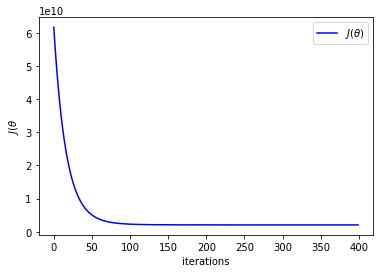

In [16]:
# Plot the convergence graph of J(theta)
# Use 'r' before the string to denote it is "raw"
plt.plot(range(num_iters), J_history, 'b-', label=r"$J(\theta)$")
plt.xlabel("iterations")
plt.ylabel(r"$J(\theta$")
plt.legend()
plt.show()

In [17]:
# Estimate the price of a 1650 sq-ft, 3 br house
# Recall that the first column of X is all-ones. Thus, it does not need
# to be normalized.
fnData = (np.array([[1650, 3]]) - mu) / sigma
price  = np.dot(np.hstack(([[1]], fnData)), theta)
print("Predicted price of a 1650 sq-ft, 3 br house (using a gradient descent):")
print(float(price))

Predicted price of a 1650 sq-ft, 3 br house (using a gradient descent):
293142.4334854096


#### 2.2.1. Selecting learning rates
In this part of the exercise, you will get to try out different learning rates for the dataset and find a learning rate that converges quickly.

The next phase is to call `gradientDescent` function and run gradient descent for about 50 iterations at the chosen learning rate. The function should also return the history of $J(\theta)$ values in a vector $J$. After the last iteration, plot the $J$ values against the number of the iterations.

We recommend trying values of the learing rate $\alpha$ on a log-scale, at multiplicative steps of about 3 times the previous value (i.e., 0.3, 0.1, 0.03, 0.01 and so on). You may also want to adjust the number of iterations you are running if that will help you see the overall trend in the curve.

**Implementation Note:** If your learning rate is too large, $J(\theta)$ can diverge and 'blow up', resulting in values which are too large for computer calculations.

Notice the changes in the convergence curves as the learning rate changes. With a small learning rate, you should find that gradient descent takes a very long time to converge to the optimal value. Conversely, with a large learning rate, gradient descent might not converge or might even diverge!

Using the beset learning rate that you found, run gradient descent until convergence to find the final values of $\theta$. Next, use this value of $\theta$ to predict the price of a house with 1650 square feet and 3 bedrooms. You will use value later to check your implementation of the normal equations. Don't forget to normalize your features when you make this prediction!

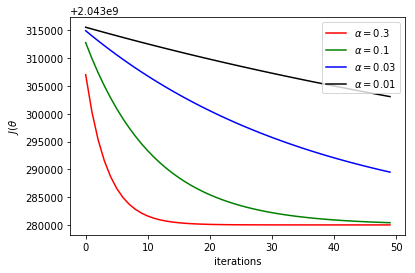

In [18]:
alpha = np.array([[0.3, 0.1, 0.03, 0.01]])
color = ['r', 'g', 'b', 'k']
num_iters = 50
initTheta = theta
for i in range(alpha.shape[1]):
    theta, J_history = gradientDescent(X, y, initTheta, float(alpha[0][i]), num_iters)
    plt.plot(range(num_iters), J_history, color[i] + '-', label=r"$\alpha =" + str(float(alpha[0][i])) + "$")
    plt.xlabel("iterations")
    plt.ylabel(r"$J(\theta$")
    plt.legend()

plt.show()

### 2.3. Normal Equations
In the lecture videos, you learned that the closed-form solution to linear regression is
$$\theta = (X^T X)^{-1} X^T \vec{y}.$$

Using this formula does not require any feature scaling, and you will get an exact solution in on calculation: there is no "loop until convergence" like in gradient descent.

Complete the function `normalEqn` to use the formula above to calculate $\theta$. Remember that while you don't need to scale your features, we still need to add a column of 1's to the $X$ matrix to have an interpret term $(\theta)$.

In [19]:
def normalEqn(X, y):
    """
    normalEqn computes the colsed-form solution to linear regression using
    the normal equation.
    """
    
    theta = np.dot(np.dot(np.linalg.pinv(np.dot(X.T, X)), X.T), y)
    
    return theta

In [20]:
# Separate features X and labels y, no need feature normalization here
X, y = np.hsplit(data, np.array([2]))

# Add intercept term to X
X = np.hstack((np.ones((m, 1), dtype=X.dtype), X))

del theta
# Calculate the paramters from the normal equation
theta = normalEqn(X, y)

# Display normal equation's result
print("Theta computed from the normal equation:")
print(str(theta))

Theta computed from the normal equation:
[[ 89597.90954361]
 [   139.21067402]
 [ -8738.01911255]]


Once you have found $\theta$ using this method, use it to make a price prediction for a 1650-square-foot house with 3 bedrooms. You should find that gives the same predicted price as the value you obtained using the model fit with gradient descent.

In [21]:
# Estimate the price of a 1650 sq-ft, 3 br hose
del price
price = np.dot(np.array([[1, 1650, 3]]), theta)
print("Predicted price of a 1650 sq-ft, 3 br house (using normal equations):")
print(str(float(price)))

Predicted price of a 1650 sq-ft, 3 br house (using normal equations):
293081.4643349892
